## Importing Libraries

In [2]:
import pandas as pd
import numpy as np

from glob import glob # serve para listar os arquivos das imagens

# Bibliotecas para imagens
import cv2
import matplotlib.pylab as plt

## Reading images

### Listing Images

In [6]:
# test
dry_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\dry\*jpg')
normal_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\normal\*jpg')
oily_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\oily\*jpg')

# Train
dry_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\dry\*jpg')
normal_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\normal\*jpg')
oily_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\oily')

# Valid
dry_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\dry\*jpg')
normal_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\normal\*jpg')
oily_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\oily\*jpg')

### Pixdel values from the images

In [13]:
img_plt = plt.imread(dry_skins_for_test[1])

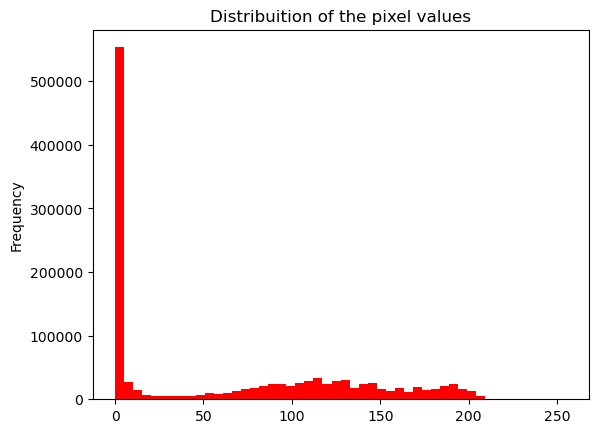

In [14]:
pd.Series(img_plt.flatten()).plot(kind='hist', bins=50, color = 'red',
                                  title='Distribuition of the pixel values')
plt.show()

### Display Images

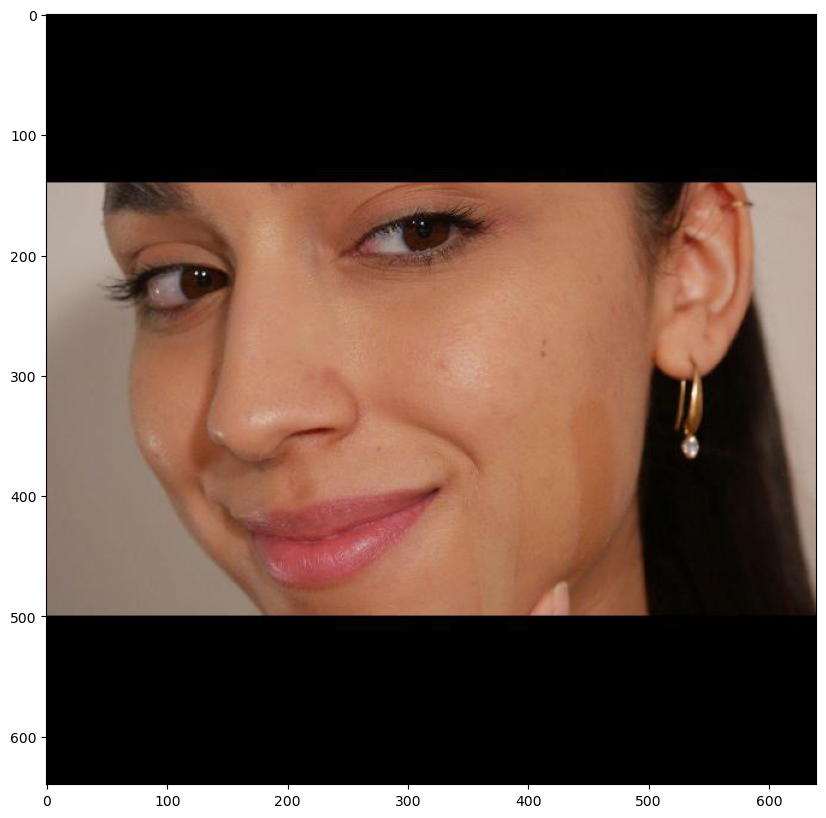

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_plt)

### isplaying RGB Channels of Our Image

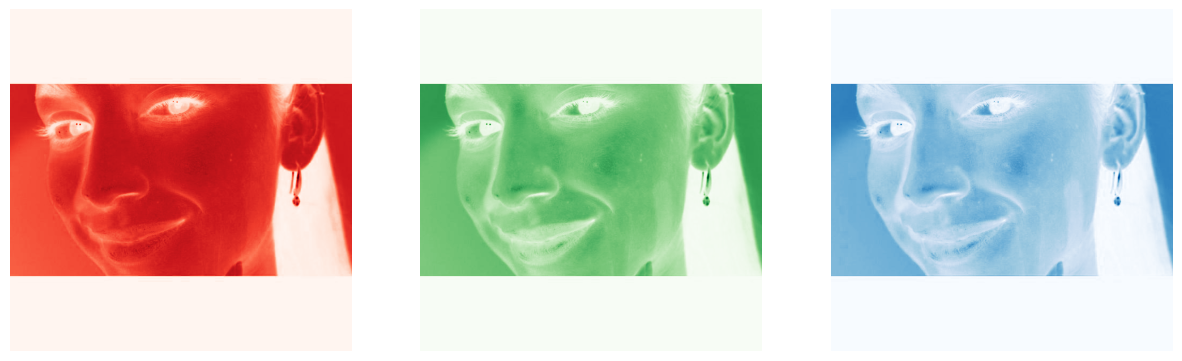

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img_plt[:,:,0], cmap='Reds')
axs[1].imshow(img_plt[:,:,1], cmap='Greens')
axs[2].imshow(img_plt[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

In [19]:
# Observation: matplotlib reads channels as RGB, while cv2 reads in channels BGR

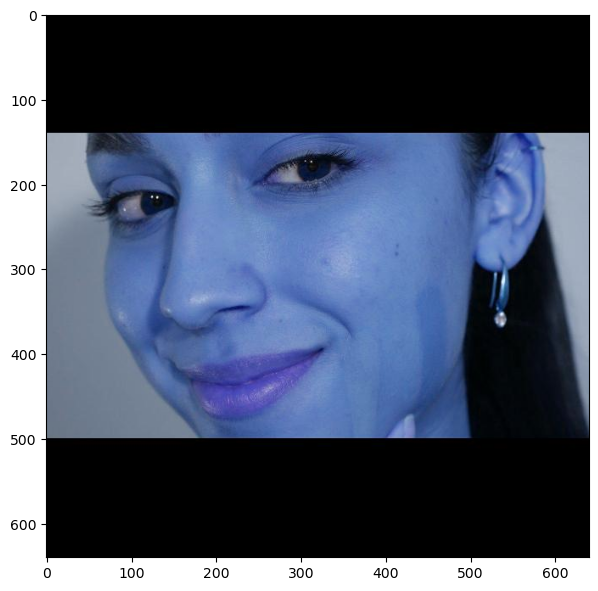

In [26]:
img_cv2 = cv2.imread(dry_skins_for_test[1])

fig, ax = plt.subplots(figsize=(7,15))
ax.imshow(img_cv2)

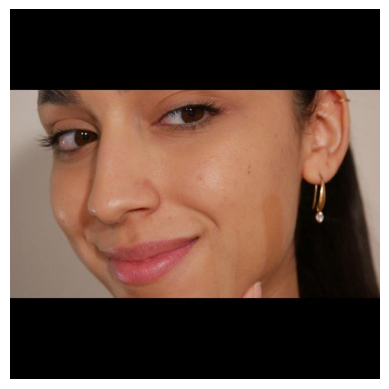

In [27]:
# But, how to convert images from BGR to RGB?

img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

## Shaperning and Blurring

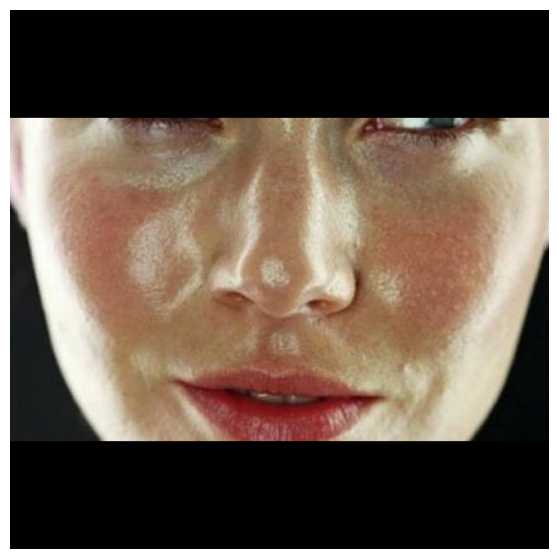

In [28]:
img_oily = plt.imread(oily_skins_for_test[2])

fig, ax = plt.subplots(figsize = (7,7))
ax.imshow(img_oily)
ax.axis('off')
plt.show()

### Sharpen Image

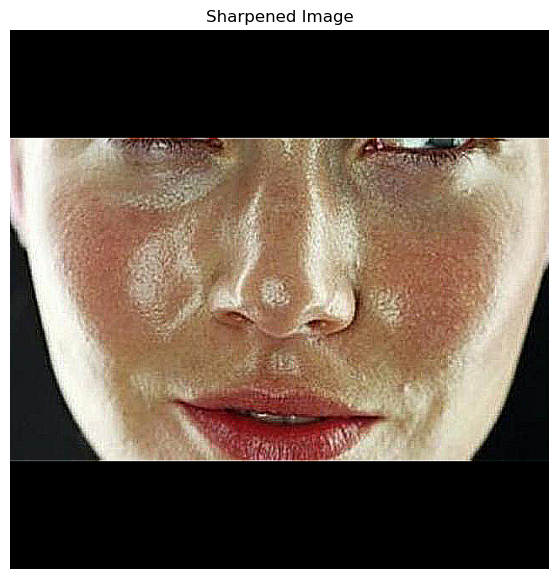

In [31]:
kernel_shaperning = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

sharpened_image = cv2.filter2D(img_oily, -1, kernel_shaperning)

# Displaying image
fig, ax = plt.subplots(figsize = (7,7))
ax.imshow(sharpened_image)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

### Blurring Image

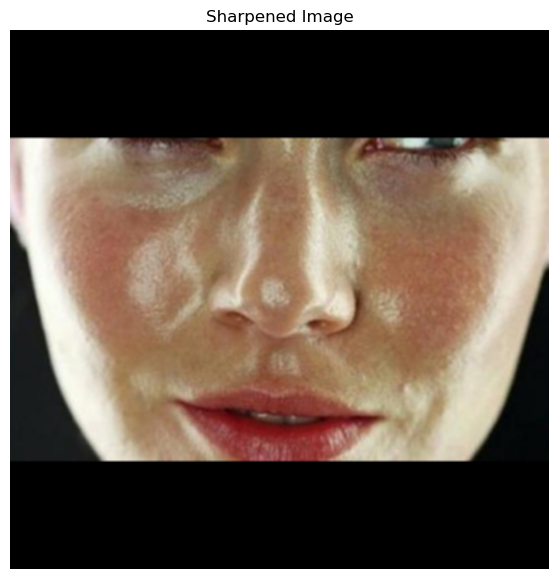

In [32]:
kernel_3x3 = np.ones((3, 3), np.float32) / 9

blurred_image = cv2.filter2D(img_oily, -1, kernel_3x3)

# Displaying image
fig, ax = plt.subplots(figsize = (7,7))
ax.imshow(blurred_image)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()